In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
Задача: y' = Exp(x) * Cos(2y^2), 
        y(0) = 1 Промежуток - [a, b] = [0, 1] 
"""

"\nЗадача: y' = Exp(x) * Cos(2y^2), \n        y(0) = 1 Промежуток - [a, b] = [0, 1] \n"

In [3]:
def mean_func(x, y):
    return np.exp(x) * np.cos(2 * y ** 2)

In [4]:
def adams_fourth(x, y, n_steps: int, h_loss: float):
    y[1] = y[0] + h_loss * mean_func(x[0], y[0])
    y[2] = y[1] + h_loss * mean_func(x[1], y[1])
    y[3] = y[2] + h_loss * mean_func(x[2], y[2])
    for i in range(4, n_steps):
        y[i] = y[i - 1] + h_loss / 24 * (55 * mean_func(x[i - 1], y[i - 1])
                                         - 59 * mean_func(x[i - 2], y[i - 2])
                                         + 37 * mean_func(x[i - 3], y[i - 3])
                                         - 9 * mean_func(x[i - 4], y[i - 4]))
    return y

In [5]:
def adams_third(x, y, n_steps: int, h_loss: float):
    y[1] = y[0] + h_loss * mean_func(x[0], y[0])
    y[2] = y[1] + h_loss * mean_func(x[1], y[1])
    for i in range(3, n_steps):
        y[i] = y[i - 1] + h_loss / 12 * (23 * mean_func(x[i - 1], y[i - 1])
                                         - 16 * mean_func(x[i - 2], y[i - 2])
                                         + 5 * mean_func(x[i - 3], y[i - 3]))
    return y


In [6]:
def runge_kutta_fourth(x, y, n_steps: int, h_loss: float):
    for i in range(1, n_steps):
        y[i] = (y[i - 1] + h_loss / 6 * (mean_func(x[i - 1], y[i - 1])
                                         + 2 * partial_runge_first(x[i - 1], y[i - 1], h_loss)
                                         + 2 * partial_runge_second(x[i - 1], y[i - 1], h_loss)
                                         + partial_runge_third(x[i - 1], y[i - 1], h_loss)))
    return y

def partial_runge_first(x, y, h_loss: float):
    k = mean_func(x + h_loss / 2, y + h_loss / 2 * mean_func(x, y))
    return k


def partial_runge_second(x, y, h_loss: float):
    k = mean_func(x + h_loss / 2, y + h_loss / 2 * partial_runge_first(x, y, h_loss))
    return k


def partial_runge_third(x, y, h_loss: float):
    k = mean_func(x + h_loss, y + h_loss * partial_runge_second(x, y, h_loss))
    return k



In [7]:
def init_render(foo, first_bound: float, second_bound: float, x_zero: int, y_zero: int, h_losses: [float], title: str):
    for h_loss in h_losses:
        for foo_val in foo:
            n_steps = int((second_bound - first_bound) / h_loss)

            x_set = np.linspace(first_bound, second_bound, num=n_steps)
            x_set[0] = x_zero

            y_set = x_set.copy()
            y_set[0] = y_zero

            y_dif_set = foo_val(x_set, y_set, n_steps, h_loss)
            x_set = np.linspace(first_bound, second_bound, num=n_steps)

            plt.plot(x_set, y_dif_set, label=f'Accuracy: {h_loss}')
            plt.legend()
            plt.title(title)

    plt.show()
    

In [8]:
# bounds of computing
a = 0.0
b = 1.0

In [9]:
# entry conditions
x_0 = 0
y_0 = 1

In [10]:
# maximum losses of accuracy
h_list = [0.1, 0.05, 0.01]

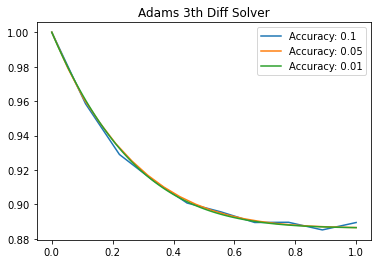

In [11]:
init_render([adams_third], a, b, x_0, y_0, h_list, 'Adams 3th Diff Solver')

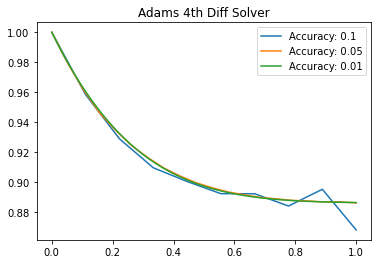

In [12]:
init_render([adams_fourth], a, b, x_0, y_0, h_list, 'Adams 4th Diff Solver')

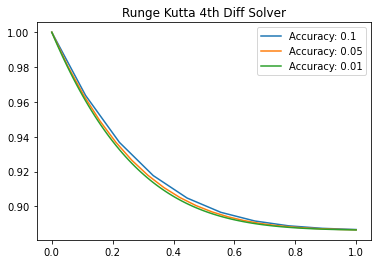

In [13]:
init_render([runge_kutta_fourth], a, b, x_0, y_0, h_list, 'Runge Kutta 4th Diff Solver')

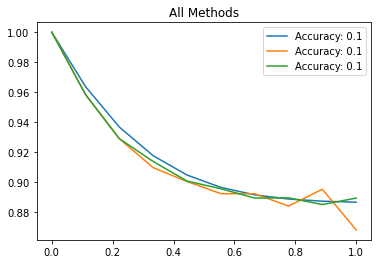

In [14]:
#All Methods with same accuracy
h_list = [0.1]
init_render([runge_kutta_fourth, adams_fourth, adams_third], a, b, x_0, y_0, h_list, 'All Methods')